# Using FaceBook's Llama models to summarise and question a pdf

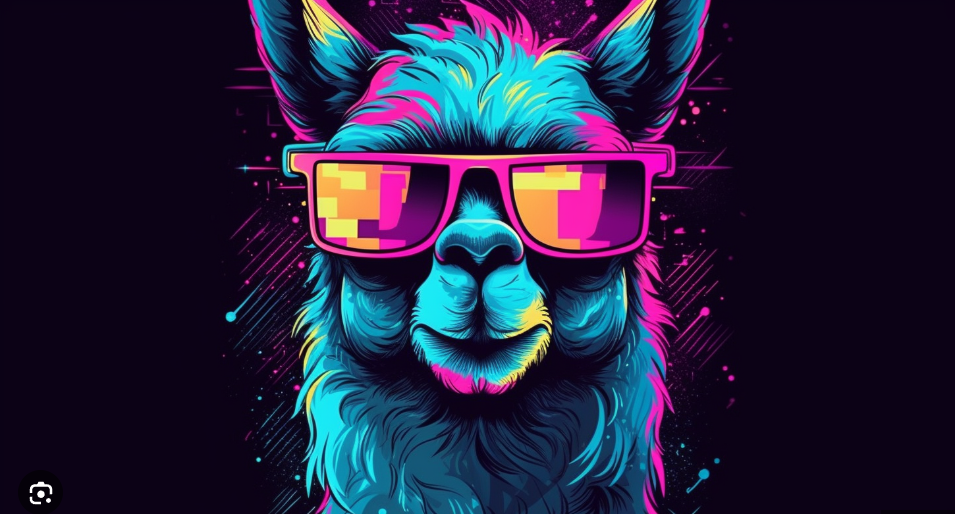

In [30]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\4. Facebook LLama from groq\\"
Image("AI Pic 5.png",width=900, height=700)

## 0.Agenda:

- Libraries we need
- Loading the pdf
- Testing the API
- Summarize funtion
- Question Answering function
- Putting it all together in a Streamlit app
- Bonus: Multible models in the app

## 1. Libraries we need

In [5]:
# pip install groq pymupdf

In [ ]:
# pip install streamlit 

In [6]:
# pip install streamlit pymupdf groq

In [ ]:
# pip install groq

## 2. Loading the PDF

In [32]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

pdf_path = 'Bitwise-The-Year-Ahead-10-Crypto-Predictions-for-2024.pdf'
pdf_text = extract_text_from_pdf(pdf_path)
pdf_text[0:1000]

'The Year Ahead:\n10 Crypto Predictions for 2024\nbitwiseinvestments.com\n12-2023\n1   |   The Year Ahead: 10 Crypto Predictions for 2024   |   Table of Contents\nIntro:\nEntering the Mainstream Era of Crypto\n03\nPrediction 1:\nBitcoin will trade above $80,000, setting a new all-time high.\n04\nPrediction 2:\nSpot bitcoin ETFs will be approved, and collectively they will be the most successful\nETF launch of all time.\n05\nPrediction 3:\nCoinbase’s revenue will double, beating Wall Street expectations by at least 10x.\n06\nPrediction 4:\nMore money will settle using stablecoins than using Visa.\n07\nPrediction 5:\nJ.P. Morgan will tokenize a fund and launch it on-chain as Wall Street gears up to\ntokenize real-world assets.\n08\nPrediction 6:\nEthereum revenue will more than double to $5 billion as users flock to crypto applications.\n09\nTable of Contents\n2   |   The Year Ahead: 10 Crypto Predictions for 2024   |   Table of Contents\nPrediction 7:\nTaylor Swift will launch NFTs to c

## 3. Testing if the API works

In [34]:
# Testing if the API Works
import os

from groq import Groq

# Initialize the Groq client
# client = Groq(api_key='')

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are a helpful assistant."
        },
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama-3.1-8b-instant",
)

print(chat_completion.choices[0].message.content)

## Available models: https://console.groq.com/docs/models

Fast language models have become increasingly crucial in recent years due to their ability to efficiently process large amounts of natural language data, make accurate predictions, and respond quickly to user inputs. Here are some key reasons why fast language models are important:

1. **Improved User Experience**: Fast language models enable applications to respond quickly to user queries, reducing latency and improving overall user experience. This is especially important for applications that require real-time interaction, such as virtual assistants, chatbots, and language translation services.
2. **Increased Accuracy**: Fast language models are often pre-trained on large datasets, which enables them to learn complex patterns and relationships in language data quickly and accurately. This, in turn, leads to improved accuracy in language understanding, generation, and translation.
3. **Scalability**: Fast language models can be easily scaled up to handle large volumes of user request

## 4. Summarizing using Llama

In [36]:
def summarize_text(text):
    try:
        summary_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Summarize the following text: {text}"
                }
            ],
            model="llama-3.1-8b-instant",
        )
        return summary_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

summary = summarize_text(pdf_text)
print("Summary:")
print(summary)

Summary:
The text discusses Bitwise Investment's top 10 predictions for the crypto market in 2024. Here's a summary of each prediction:

1. **Bitcoin will trade above $80,000, setting a new all-time high**: Bitwise expects a spot bitcoin ETF to be approved, leading to increased demand and a reduction in supply, causing bitcoin's price to surge.
2. **Spot bitcoin ETFs will be approved, and collectively they will be the most successful ETF launch of all time**: Bitwise predicts that spot bitcoin ETFs will capture 1% of the $7.2 trillion US ETF market, gathering $72 billion in assets.
3. **Coinbase's revenue will double, beating Wall Street estimates by at least 10x**: Bitwise expects Coinbase's revenue to increase due to the bull market, innovation, and ETFs, with a potential doubling of revenue.
4. **More money will settle using stablecoins than using Visa**: Stablecoins are expected to grow in usage, leading to increased activity and potentially surpassing Visa's payment volume.
5. **J

## 5. Questioning the data using Llama

In [38]:
def ask_question(context, question):
    try:
        answer_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Context: {context} Question: {question}"
                }
            ],
            model="llama-3.1-8b-instant",
        )
        return answer_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

question = "What is the main topic of the document?"
answer = ask_question(pdf_text, question)
print("Answer:")
print(answer)

Answer:
The main topic of the document is Bitwise Investments' predictions and insights for the year 2024 in the cryptocurrency and blockchain space. The document presents 10 predictions for the year ahead, covering various aspects of the industry, including Bitcoin price movements, ETF approvals, Coinbase's revenue growth, stablecoin adoption, NFTs, AI assistants, prediction markets, and Ethereum blockchain upgrades.


## 6. Putting it all together in a Streamlit app

In [16]:
import streamlit as st
import fitz  # PyMuPDF
from groq import Groq
from PIL import Image

# Initialize the Groq client
client = Groq(api_key='')

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def summarize_text(text):
    try:
        summary_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Summarize the following text: {text}"
                }
            ],
            model="llama-3.1-8b-instant",
        )
        return summary_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

def ask_question(context, question):
    try:
        answer_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Context: {context} Question: {question}"
                }
            ],
            model="llama-3.1-8b-instant",
        )
        return answer_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

# Streamlit UI
st.title("PDF Summarizer and Question Answering")
image = Image.open('AI Pic 5.png')
st.image(image, use_column_width='always')

uploaded_file = st.file_uploader("Upload a PDF file", type="pdf")

if uploaded_file is not None:
    pdf_text = extract_text_from_pdf(uploaded_file)
    
    st.subheader("Text Extracted from PDF:")
    st.write(pdf_text[:500])  # Display a snippet of the text for review

    summary_button = st.button("Summarize Text")
    if summary_button:
        summary = summarize_text(pdf_text)
        st.subheader("Summary:")
        st.write(summary)

    question = st.text_input("Ask a question about the PDF:")
    if question:
        answer = ask_question(pdf_text, question)
        st.subheader("Answer:")
        st.write(answer)

2024-09-18 13:52:54.324 
  command:

    streamlit run Y:\Python\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## 6. Adding additional models

In [18]:
import streamlit as st
import fitz  # PyMuPDF
from groq import Groq

# Initialize the Groq client
client = Groq(api_key='')

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def summarize_text(text, model_name):
    try:
        summary_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Summarize the following text: {text}"
                }
            ],
            model=model_name,
        )
        return summary_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

def ask_question(context, question, model_name):
    try:
        answer_response = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant."
                },
                {
                    "role": "user",
                    "content": f"Context: {context} Question: {question}"
                }
            ],
            model=model_name,
        )
        return answer_response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

# Streamlit UI
st.title("PDF Summarizer and Question Answering")
image = Image.open('AI Pic 5.png')
st.image(image, use_column_width='always')

uploaded_file = st.file_uploader("Upload a PDF file", type="pdf")

if uploaded_file is not None:
    pdf_text = extract_text_from_pdf(uploaded_file)
    
    st.subheader("Text Extracted from PDF:")
    st.write(pdf_text[:500])  # Display a snippet of the text for review

    # Model selection for summarization
    summarize_model = st.selectbox(
        "Choose a model for summarization:",
        ["mixtral-8x7b-32768", "llama-3.1-8b-instant", "gemma-7b-it", "llama3-70b-8192", "whisper-large-v3"]
    )

    summary_button = st.button("Summarize Text")
    if summary_button:
        summary = summarize_text(pdf_text, summarize_model )
        st.subheader("Summary:")
        st.write(summary)

    # Model selection for question answering
    question_model = st.selectbox(
        "Choose a model for question answering:",
        ["mixtral-8x7b-32768", "llama-3.1-8b-instant", "gemma-7b-it", "llama3-70b-8192", "whisper-large-v3"]
    )

    question = st.text_input("Ask a question about the PDF:")
    if question:
        answer = ask_question(pdf_text, question, question_model)
        st.subheader("Answer:")
        st.write(answer)